# Author : Pradip Kumar Murmu
## Task2: Prediction using Unsupervised Learning

In this task, I try to cluster the datapoints using K-Means clustering algorithm.

This is a simple clustering task as it involves five variables.

# Import important libraries

In [21]:
#import important libraries
import pandas as pd # Data Preprocessing
import numpy as np #Linear Algebra

import matplotlib.pyplot as plt #Visualize the data
import seaborn as sns

from sklearn.cluster import KMeans # K-Means Clustering Algorithm
from scipy.spatial.distance import cdist #used to calculate distance b/w two points

# Load the data from local machine

In [2]:
# load the data from local machine
path ='Iris_dataset.csv'
data = pd.read_csv(path)
print('load the data successfully.')

load the data successfully.


# Display the data

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Data preprocessing
Splitting the into X (features) and Y (Labelled class)

In [4]:
X = data.iloc[:,1:-1].values
Y = data.iloc[:,-1].values

In [5]:
# Unique values of Species column
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
#display first five records of X 
print(X[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


# Elbow Method
The elbow method helps to choose the optimum value of ‘K’ (number of clusters) by fitting the model with a range of values of ‘K’.

## We can calculate Elbow method two ways:
### 1. Distortion : The average of the squared distances from the cluster centers of the respective clusters.
-----------------------------------
### 2. Inertia : Sum of squared distances of samples to their closest cluster center.

In [7]:
distortion =[]  # List of distortion value
inertia =[] # List of inertia value
K = [i for i in range(1,11)] # K takes 1 to 10 values
for i in K:
    kmeans = KMeans(n_clusters=i, random_state=0) # KMeans Model which i number of clusters
    kmeans.fit(X) # Feed the model X data
    
    distortion_value = sum(np.min(cdist(X,kmeans.cluster_centers_, 'euclidean'), axis=1))/len(X) #calculate distortion value
    distortion.append(distortion_value) # adds distortion_value value to distortion list
    
    inertia.append(kmeans.inertia_) # adds inertia value to inertia list

# The Elobow Method using Distortion

No handles with labels found to put in legend.


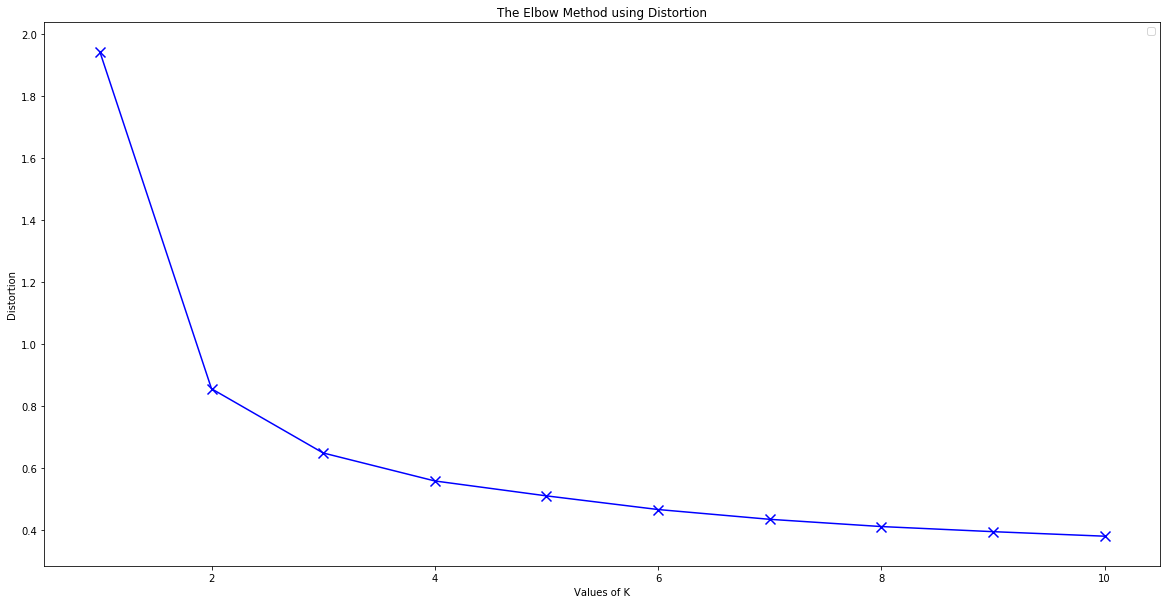

In [8]:
plt.figure(figsize=(20,10))

plt.plot(K,distortion, color='blue') #plot the data
plt.scatter(K,distortion,color='blue', marker='x', s=100) # scatterplot of data points


plt.title('The Elbow Method using Distortion') # title of the plot
plt.xlabel('Values of K') # x-axis label
plt.ylabel('Distortion') # y-axis label
plt.legend() 
plt.show() # Show the plot

# Elbow Method using Inertia

No handles with labels found to put in legend.


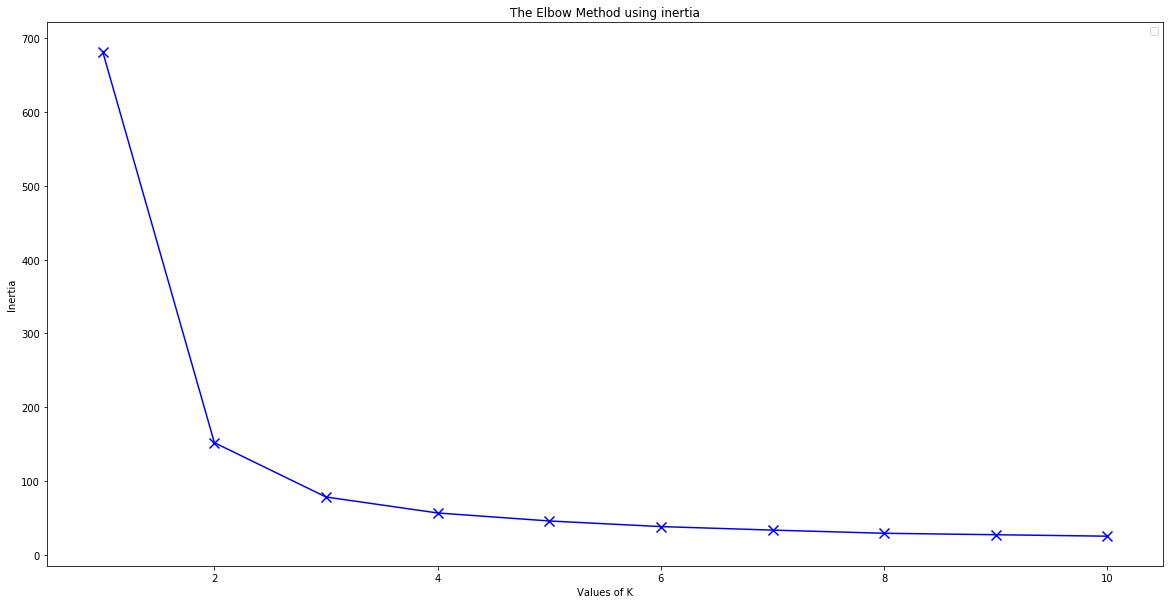

In [9]:
plt.figure(figsize=(20,10))

plt.plot(K, inertia, color='blue') # plot 
plt.scatter(K, inertia, color='blue', marker='x', s=100) # scatter plot k vs inertia

plt.title('The Elbow Method using inertia') # title of the graph
plt.xlabel('Values of K') # x-axis label
plt.ylabel('Inertia') # y-axis label
plt.legend()
plt.show() # show the graph

### We can clearly see why it is called 'The elbow method' from the above graph. The optimum clusters is where the elbow occurs. This is when the within cluster sum of squares doesn't decrease significantly with every iteration.

## From this we choose the number of clusters as 3 (Three)

In [10]:
kmeans3 = KMeans(n_clusters=3, random_state = 0) # KMeans classifier

y_pred = kmeans3.fit_predict(X) # feed and predict using classifier


# Visualize the data

### Plotting the original dataset before clustering

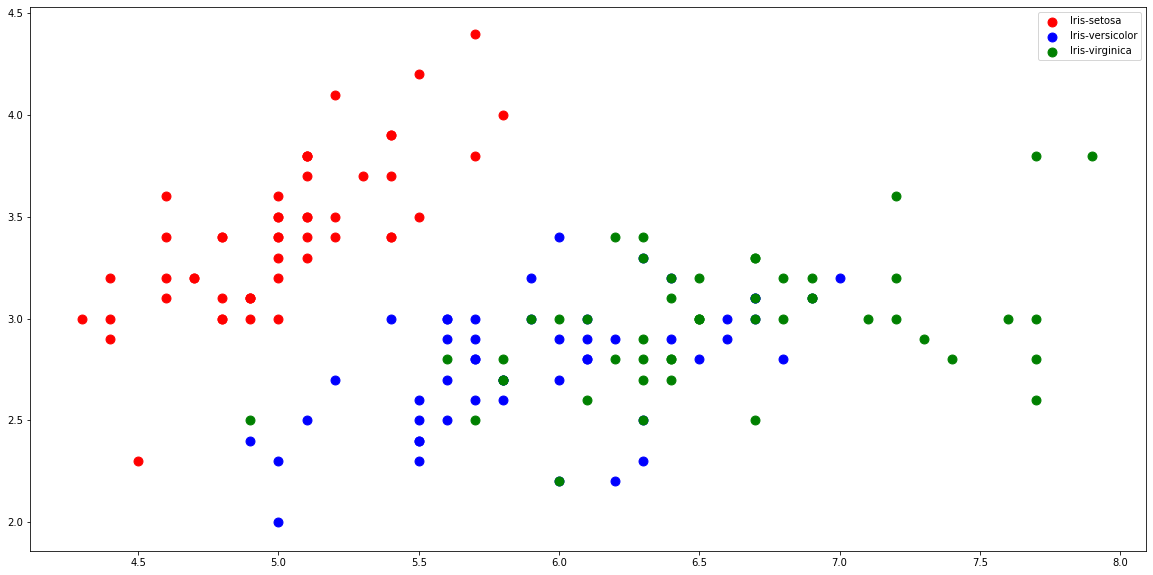

In [11]:
iris_df_label0 = data[data['Species']=='Iris-setosa']
iris_df_label1 = data[data['Species']=='Iris-versicolor']
iris_df_label2 = data[data['Species']=='Iris-virginica']

plt.figure(figsize=(20,10))
plt.scatter(iris_df_label0['SepalLengthCm'],iris_df_label0['SepalWidthCm'],s=80, color='red', label ='Iris-setosa')
plt.scatter(iris_df_label1['SepalLengthCm'],iris_df_label1['SepalWidthCm'], s=80, color='blue', label ='Iris-versicolor')
plt.scatter(iris_df_label2['SepalLengthCm'],iris_df_label2['SepalWidthCm'], s=80, color='green', label ='Iris-virginica')
plt.legend()
plt.show()

### Plotting the data after clustering

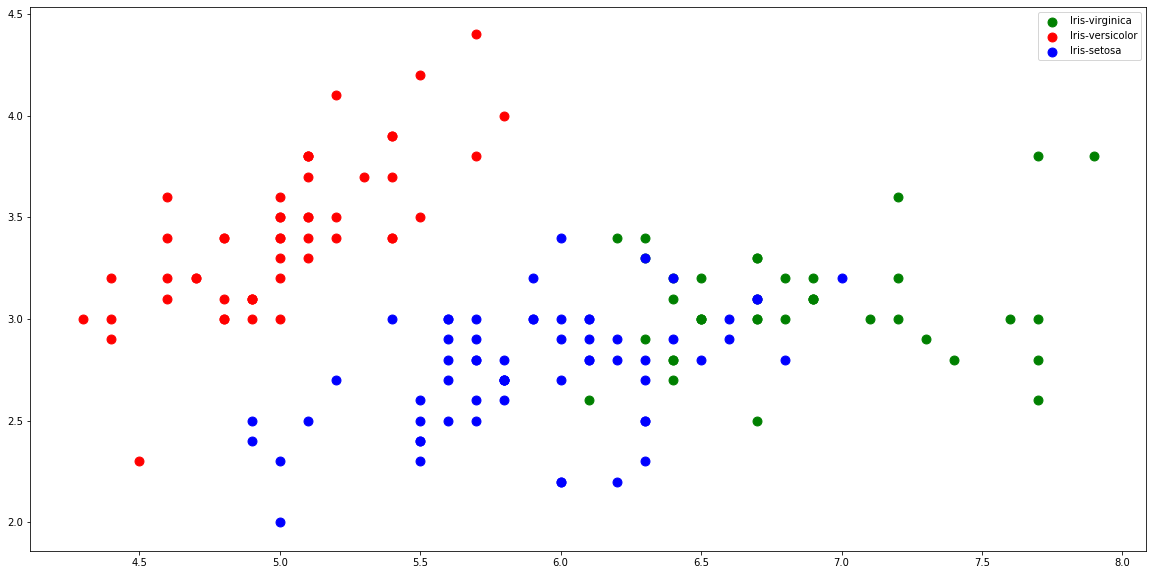

In [12]:
# creating the Dataframe
iris_df = pd.DataFrame(X, columns=['Sepal length', 'Sepal Width', 'Petal length', 'Petal width'])
iris_df['y_pred']=y_pred


iris_df_label0 = iris_df[iris_df['y_pred']==0] # Iris-virginica
iris_df_label1 = iris_df[iris_df['y_pred']==1] # Iris-versicolor
iris_df_label2 = iris_df[iris_df['y_pred']==2] # Iris-setosa


plt.figure(figsize=(20,10))
plt.scatter(iris_df_label0['Sepal length'],iris_df_label0['Sepal Width'],s=80, color='green', label ='Iris-virginica')
plt.scatter(iris_df_label1['Sepal length'],iris_df_label1['Sepal Width'], s=80, color='red', label ='Iris-versicolor')
plt.scatter(iris_df_label2['Sepal length'],iris_df_label2['Sepal Width'], s=80, color='blue', label ='Iris-setosa')
plt.legend()
plt.show()

# Pairplot of datapoints before clustering

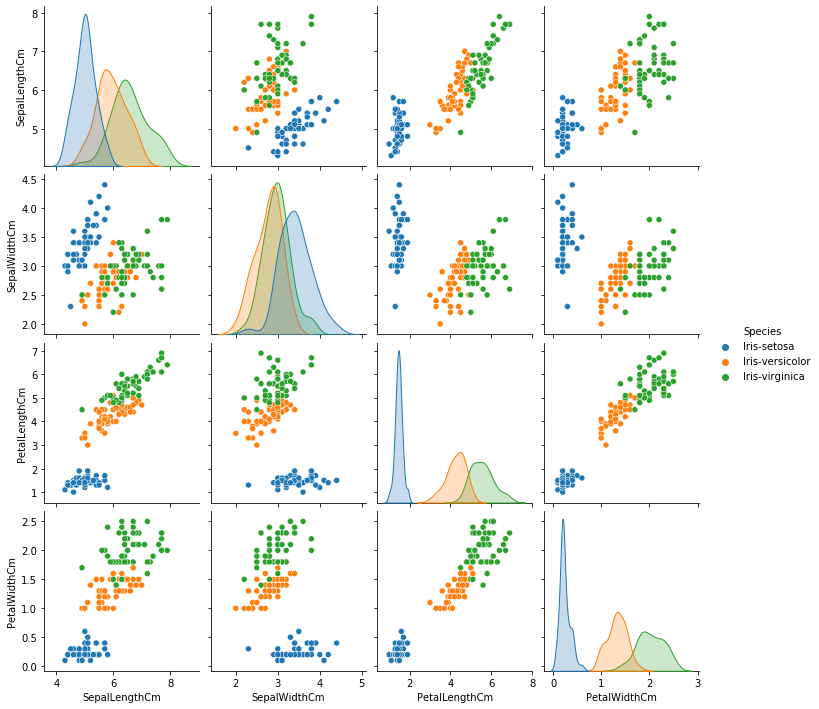

In [13]:
sns.pairplot(data=data,
             vars=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
            kind='scatter',
            hue='Species')

# Creating the data and pairplot of datapoints after the datapoints

In [14]:
# label of columns
iris_df.columns

Index(['Sepal length', 'Sepal Width', 'Petal length', 'Petal width', 'y_pred'], dtype='object')

In [15]:
# function mapping predicted outputs to corresponding labels
def colormap(x):
    if x == 0:
        return 'Iris-virginica' # O - Iris-virginica
    elif x == 1:
        return 'Iris-versicolor' # 1 - Iris-versicolor
    elif x == 2:
        return 'Iris-setosa' # 2 - Iris-setosa

In [16]:
# apply the function y_pred column in iris_df dataframe
iris_df['y_pred'] =  iris_df.apply(lambda x: colormap(x['y_pred']), axis=1)


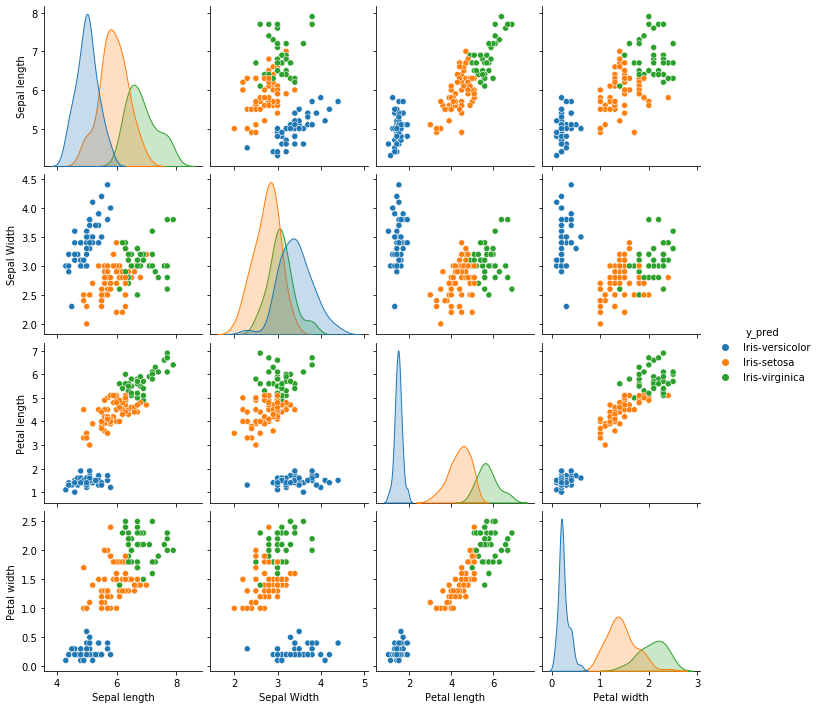

In [19]:
#pairplot of iris_df dataframe 
sns.pairplot(data=iris_df,
             vars = ['Sepal length', 'Sepal Width', 'Petal length', 'Petal width'],
            kind = 'scatter',
            hue = 'y_pred',
            )

# Conclusion:
---------------------------------------------
## I was successfully able to carry-out prediction using unsupervised ML task and was able to predict the optimum number of clusters and represent it visually.


# THANK YOU